In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [0]:
env = gym.make("FrozenLake8x8-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 30000
learning_rate = 0.1
max_steps = 299
discount = 0.95
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.0005

In [0]:
q1_table = np.zeros((obs_num, action_num))
q2_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [6]:
%%time

rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q1_table[state,:] + q2_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    if reward == 0 and done == True:
      reward = -1
    elif done == False:
      reward = 0
    else:
      reward = 1

    # Update q-table
    a1_max = np.argmax(q1_table[new_state, :])
    a2_max = np.argmax(q2_table[new_state, :])

    if random.uniform(0,1) > 0.5:
      q1_table[state, action] = q1_table[state, action] + learning_rate * (reward + 
                  discount * q2_table[new_state, a1_max] - q1_table[state, action])
    else:
      q2_table[state, action] = q2_table[state, action] + learning_rate * (reward + 
                  discount * q1_table[new_state, a2_max] - q2_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step + 1)

    if done == True:
      break

  if cumul_rewards < 1:
    steps_till_success.append(max_steps + 1)
  if episode % 4000 == 0:
    learning_rate = learning_rate / 2
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:-0.1706
Min step to success: 16
CPU times: user 55 s, sys: 42.5 ms, total: 55 s
Wall time: 55.1 s


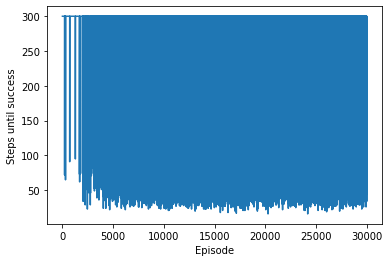

In [7]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

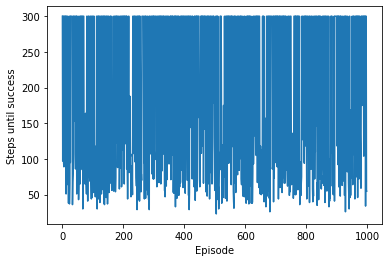

In [8]:
plt.plot(steps_till_success[-1001:-1])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [0]:
print(q1_table)

[[ 0.05001763  0.04785128  0.04870205  0.0448093 ]
 [-0.22178678 -0.40885718 -0.34727747  0.03883272]
 [-0.13369296 -0.10622995 -0.00857268  0.03096684]
 [-0.37051162 -0.32090961 -0.45462165  0.02691808]
 [ 0.05886626 -0.59195616 -0.16513318 -0.34072414]
 [ 0.          0.          0.          0.        ]
 [-0.42018853 -0.72424579 -0.35491338 -0.57279457]
 [ 0.          0.          0.          0.        ]
 [-0.12461816 -0.10851213 -0.34911372  0.06696601]
 [-0.17403774  0.11640859 -0.10759883 -0.42213598]
 [ 0.02791715 -0.16212404 -0.08238712 -0.20586383]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.016894    0.0924574   0.24515408  0.14941079]
 [ 0.34232511  0.4190495   0.42790411  0.54700731]
 [ 0.          0.          0.          0.        ]]


In [0]:
print(q2_table)

In [9]:
q_table = q1_table + q2_table

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step + 1)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 72
****************************************************
EPISODE  1
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 70
****************************************************
EPISODE  2
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 74
****************************************************
EPISODE  3
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 36
****************************************************
EPISODE  4
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 42


In [10]:
total_reward = 0
steps = []

for episode in range(1000):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          if reward > 0:
            steps.append(step + 1)
          # else:
          #   step.append(max_steps + 1)
          break
        state = new_state
env.close()

print(f'Successful runs out of 1000: {total_reward}')
print(f'Average steps: {np.mean(steps)}')
print(np.var(steps))

Successful runs out of 1000: 861.0
Average steps: 94.2439024390244
1730.1286649103424


In [0]:
df1 = pd.DataFrame()
df1['steps'] = steps_till_success
df1.to_csv('Q_double_tab_FL8x8_30000_steps.csv')
files.download(r'Q_double_tab_FL8x8_30000_steps.csv')